In [1]:
import os
from runner.runner import Runner
from env.robot_1d import CorridorEnv, CorridorEnv_v2, CorridorFullyVisibleEnv, RandomRobotEnv


### Set up

In [2]:
# Example configuration
class Args:
    def __init__(self):
        self.env_name = 'CorridorEnv'
        self.algorithm_name = 'PPO'
        self.experiment_name = 'corridor_experiment'
        self.use_centralized_V = False
        self.num_env_steps = 1000000
        self.episode_length = 10000
        self.n_rollout_threads = 1
        self.use_linear_lr_decay = False
        self.hidden_size = 64
        self.gamma = .99
        self.gae_lambda = .95
        self._use_gae = True
        self.actor_lr = 7e-4
        self.critic_lr = 1e-3
        self.opti_eps=1e-5
        self.weight_decay=0
        self.gamma=0.99
        self.clip_param=0.2
        self.value_loss_coef=1
        self.entropy_coef=0.01
        self.ppo_epoch=10
        self.num_mini_batch=1
        self.huber_delta=10.0
        self.use_huber_loss=True
        self.use_clipped_value_loss=True
        self.gain = 0.01
        self.use_orthogonal = True
        self.use_feature_normalization = True
        self.use_ReLU = True
        self.layer_N = 1
        self.log_interval = 1000  # log every x steps
        

# Assuming CorridorEnv is defined as in your previous example
num_cells = 100
num_agents = 1
env = CorridorEnv_v2(num_cells=num_cells, num_agents=num_agents)

config = {
    'all_args': Args(),
    'env': env,
    'device': 'cpu',
    'num_agents': 1,
}

In [3]:
# obs = env.reset()
# env.robot_position
# print(obs)
# av= env.get_available_actions(obs)
# print(av)

In [4]:
#robot = RandomRobotEnv(env)


In [5]:
# obs = env.reset()

# done = False
# while not done:
#     action = robot.compute_single_action(obs, verbose=True)
#     obs, rew, done = env.step(action)


0 / 100 episodes, total number of timesteps: 10000/1000000, FPS 4327. 
average episode rewards is -9596.999883651733 (av.reward: -0.9596999883651733 * ep_length 10000)

1 / 100 episodes, total number of timesteps: 20000/1000000, FPS 4284. 
average episode rewards is -9194.999933242798 (av.reward: -0.9194999933242798 * ep_length 10000)

2 / 100 episodes, total number of timesteps: 30000/1000000, FPS 4276. 
average episode rewards is -9496.999979019165 (av.reward: -0.9496999979019165 * ep_length 10000)

3 / 100 episodes, total number of timesteps: 40000/1000000, FPS 4295. 
average episode rewards is -9496.999979019165 (av.reward: -0.9496999979019165 * ep_length 10000)

4 / 100 episodes, total number of timesteps: 50000/1000000, FPS 4322. 
average episode rewards is -9596.999883651733 (av.reward: -0.9596999883651733 * ep_length 10000)

5 / 100 episodes, total number of timesteps: 60000/1000000, FPS 4336. 
average episode rewards is -9898.9999294281 (av.reward: -0.9898999929428101 * ep_le

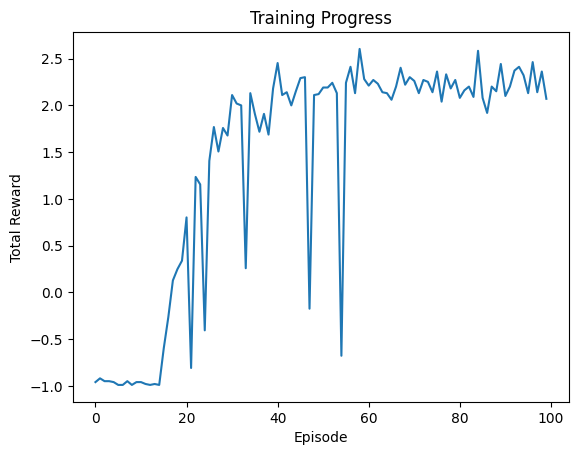

In [6]:
runner = Runner(config)
#runner.warmup()
runner.run(verbose=False)

In [7]:
#runner.buffer.action_log_probs

In [8]:
runner.save()

### Manual Test

In [18]:
import numpy as np
episode_length = 200


env_manual = CorridorEnv_v2(num_cells=num_cells, num_agents=num_agents, robot_position=0, set_manually=True)

done = False
obs = env_manual.reset()
done = False
episode_reward = 0
counter_step = 0
while not done:
    print(f'Observation: {obs}: Robot position: {env_manual.robot_position}, Coin position: {env_manual.coin_position}')
    values, actions, action_log_probs, action_probs = runner.policy.get_actions(
        np.array([obs]),  # wrap in batch dimension
        np.array([obs]),
        np.array([env.get_available_actions(obs)]),
       deterministic=True
    )
    actions_env = actions[0, 0].item()  # get the action for the first (and only) agent
    obs, reward, done = env_manual.step(actions_env)
    episode_reward += reward
    counter_step += 1
    if counter_step == episode_length:
        print('The maximum length of episode is reached.')
        break
    
    user_friendly_format = [[f"{num*100:.0f}%" for num in row] for row in action_probs.tolist()]
    print(f'Action: {actions_env}, action probability: {user_friendly_format}')
    print('=======')

Observation: [1 0 0 0 0 0 0 0 0 0 1 0]: Robot position: 0, Coin position: 17
Action: 2, action probability: [['9%', '0%', '91%', '0%', '0%']]
Observation: [0 0 0 0 0 0 0 0 0 0 1 0]: Robot position: 1, Coin position: 17
Action: 2, action probability: [['2%', '0%', '97%', '0%', '0%']]
Observation: [0 0 0 0 0 0 0 0 0 0 1 0]: Robot position: 2, Coin position: 17
Action: 2, action probability: [['2%', '0%', '97%', '0%', '0%']]
Observation: [0 0 0 0 0 0 0 0 0 0 1 0]: Robot position: 3, Coin position: 17
Action: 2, action probability: [['2%', '0%', '97%', '0%', '0%']]
Observation: [0 0 0 0 0 0 0 0 0 0 1 0]: Robot position: 4, Coin position: 17
Action: 2, action probability: [['2%', '0%', '97%', '0%', '0%']]
Observation: [0 0 0 0 0 0 0 0 0 0 1 0]: Robot position: 5, Coin position: 17
Action: 2, action probability: [['2%', '0%', '97%', '0%', '0%']]
Observation: [0 0 0 0 0 0 0 0 0 0 1 0]: Robot position: 6, Coin position: 17
Action: 2, action probability: [['2%', '0%', '97%', '0%', '0%']]
Observ

In [10]:
0 == True

False

### Test

In [20]:
runner.eval(num_episodes=3, episode_length=300, deterministic=True, verbose=False)

Episode 1: Reward = 201, Number of steps: 101
=======  EPISODE END  ================

Episode 2: Reward = 157, Number of steps: 145
=======  EPISODE END  ================

Episode 3: Reward = 241, Number of steps: 61
=======  EPISODE END  ================

Average Reward over 3 episodes: 199.66666666666666


In [21]:
runner.restore('save_dir')

In [22]:
runner.eval(num_episodes=3, episode_length=300, deterministic=True, verbose=False)

Episode 1: Reward = 236, Number of steps: 66
=======  EPISODE END  ================

Episode 2: Reward = 240, Number of steps: 62
=======  EPISODE END  ================

Episode 3: Reward = 170, Number of steps: 132
=======  EPISODE END  ================

Average Reward over 3 episodes: 215.33333333333334
